# 1. Standard Scaling
`Standard scaling` is a technique used to normalize the data by scaling each feature to a given range. This is done by subtracting the mean of the feature from each value and dividing by the standard deviation of the feature.

The formula is as follows:
$$
\begin{align}
x_{i}^{'} &= \frac{x_{i} - \mu}{\sigma}
\end{align}
$$
where $x_{i}^{'}$ is the scaled value, $x_{i}$ is
the original value, $\mu$ is the mean of the feature, and $\sigma$ is the
standard deviation of the feature.


In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [14]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# convert this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [15]:
# get the scaler
scaler = StandardScaler()

# fit the scaler
df['stand_height'] = scaler.fit_transform(df[['height']])
df.head()

,age,height,weight,stand_height
0,25,165,55,-1.414214
1,30,170,60,-0.707107
2,35,175,65,0.000000
3,40,180,70,0.707107
4,45,185,75,1.414214


---
# MinMax Scaler

In [16]:
# get the scaler
scaler = MinMaxScaler()

# fit the scaler
df['MinMax_height'] = scaler.fit_transform(df[['height']])
df.head()

,age,height,weight,stand_height,MinMax_height
0,25,165,55,-1.414214,0.00
1,30,170,60,-0.707107,0.25
2,35,175,65,0.000000,0.50
3,40,180,70,0.707107,0.75
4,45,185,75,1.414214,1.00


---
# MaxAbs Scaler

In [17]:
# get the scaler
scaler = MaxAbsScaler()

# fit the scaler
df['MaxAbs_height'] = scaler.fit_transform(df[['height']])
df.head()

,age,height,weight,stand_height,MinMax_height,MaxAbs_height
0,25,165,55,-1.414214,0.00,0.891892
1,30,170,60,-0.707107,0.25,0.918919
2,35,175,65,0.000000,0.50,0.945946
3,40,180,70,0.707107,0.75,0.972973
4,45,185,75,1.414214,1.00,1.000000


In [18]:
from sklearn.preprocessing import RobustScaler

# get the scaler
scaler = RobustScaler()
# fit the scaler
df['robust_height'] = scaler.fit_transform(df[['height']])
df.head()

,age,height,weight,stand_height,MinMax_height,MaxAbs_height,robust_height
0,25,165,55,-1.414214,0.00,0.891892,-1.0
1,30,170,60,-0.707107,0.25,0.918919,-0.5
2,35,175,65,0.000000,0.50,0.945946,0.0
3,40,180,70,0.707107,0.75,0.972973,0.5
4,45,185,75,1.414214,1.00,1.000000,1.0


---
# Transformation

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# generate non-normal data (exponential distribution)
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(data, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

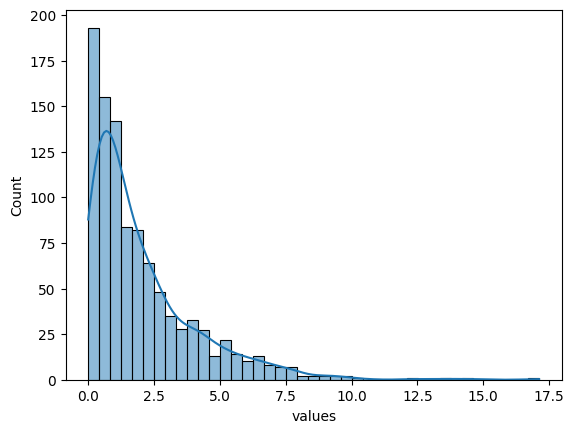

In [26]:
sns.histplot(df['values'], kde=True)

In [38]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

- for `Box-Cox` data must be positive.

In [39]:
df['box-cox'] = pt_boxcox.fit_transform(df[['values']])
df['yeo-johnson'] = pt_boxcox.fit_transform(df[['values']])
df['quantile_normal'] = qt_normal.fit_transform(df[['values']])
df.head()

,values,box-cox,yeo-johnson,quantile_normal
0,1.591749,0.158969,0.158969,0.162552
1,2.511862,0.602906,0.602906,0.587964
2,1.846446,0.298068,0.298068,0.286135
3,1.574402,0.148897,0.148897,0.157469
4,1.102097,-0.164776,-0.164776,-0.154930


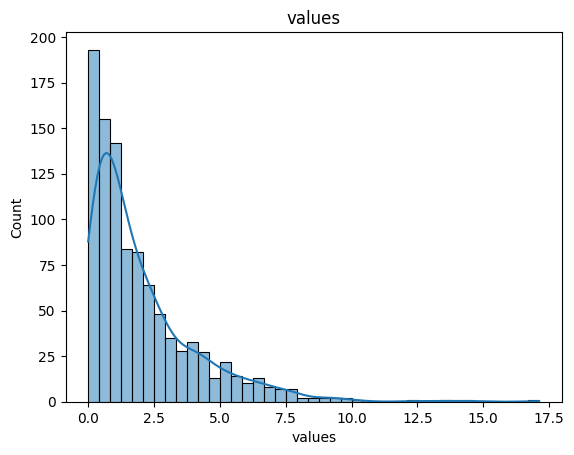

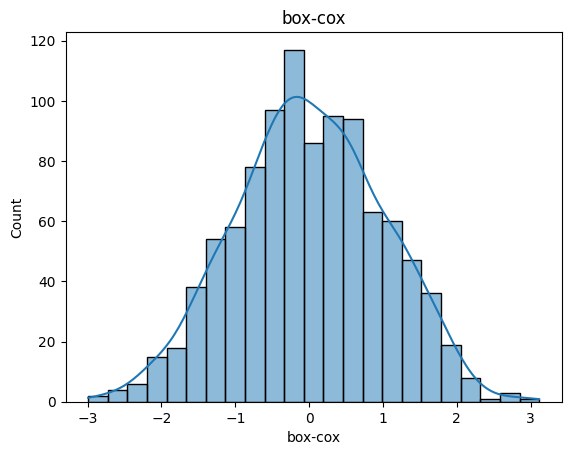

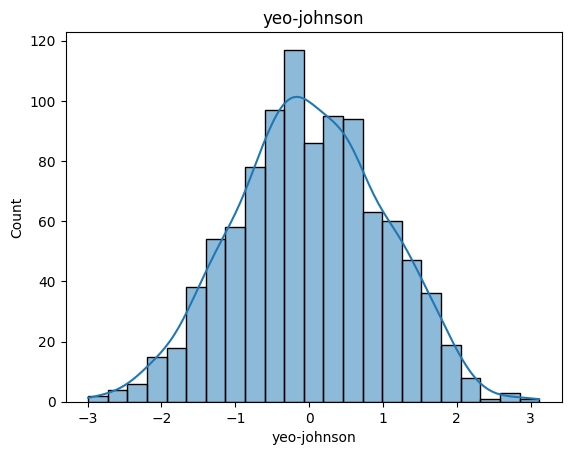

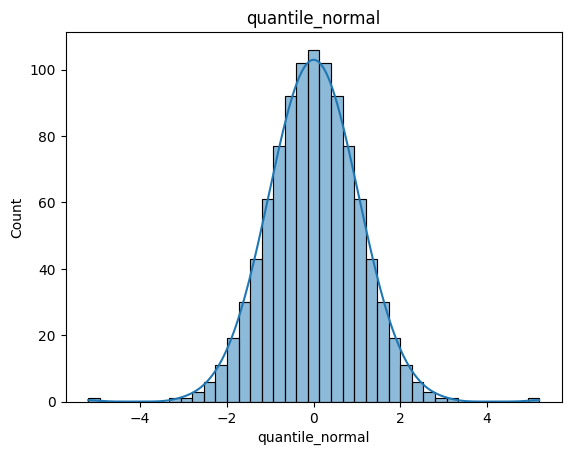

In [40]:
# a histogram for all columns usinf for loop and kde true
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

---
# Normalization

## L2-Normalizer:
- Normalizes the input to have unit length
- Input: 2D array
- Output: 2D array

In [41]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


## L1-Normalizer:
- Normalizes the input data to have zero mean and unit variance

In [42]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation

In [46]:
import pandas as pd
import numpy as np

# make an example dataset with skewed values
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,1800,18500],
    'weight': [55,60,65,70,75]
}
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,1800,70
4,45,18500,75


<Axes: xlabel='height', ylabel='Count'>

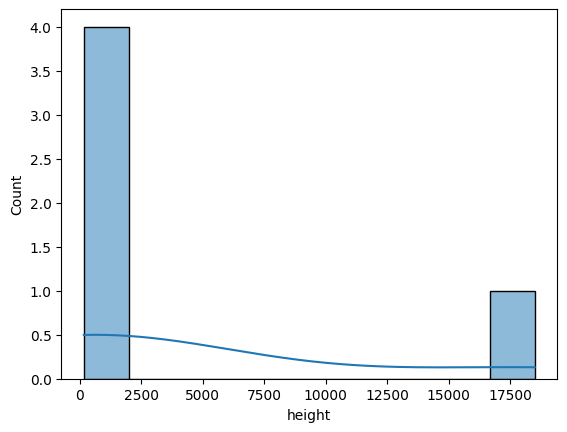

In [47]:
sns.histplot(df['height'], kde=True)

In [48]:
# get the scaler
df['log_height'] = np.log(df['height'])
df.head()

,age,height,weight,log_height
0,25,165,55,5.105945
1,30,170,60,5.135798
2,35,175,65,5.164786
3,40,1800,70,7.495542
4,45,18500,75,9.825526


<Axes: xlabel='log_height', ylabel='Count'>

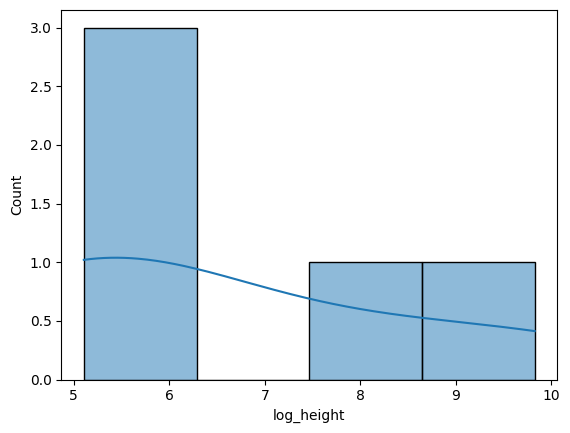

In [49]:
sns.histplot(df['log_height'], kde=True)